# Code for figure S6

In [185]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import tifffile
import numpy as np
import glob
import pandas as pd
from skimage.measure import regionprops
from skimage.util import view_as_windows
import seaborn as sns
from tqdm.notebook import tqdm

In [186]:
fname = 'WellG02_ChannelDAPI_Seq0068_6'
# WellE07_ChannelDAPI_Seq0050_7

img = tifffile.imread(f'/ewsc/hschluet/pbmc5/seg_voronoi_otsu/Plate4/segmentation/dna_projections_2d/{fname}.tiff')
seg = tifffile.imread(f'/ewsc/hschluet/pbmc5/seg_voronoi_otsu/Plate4/segmentation/labeled_segmentation_3d/{fname}.tiff')

## Example segmentations

### Fig. S7a

(-0.5, 1023.5, 1023.5, -0.5)

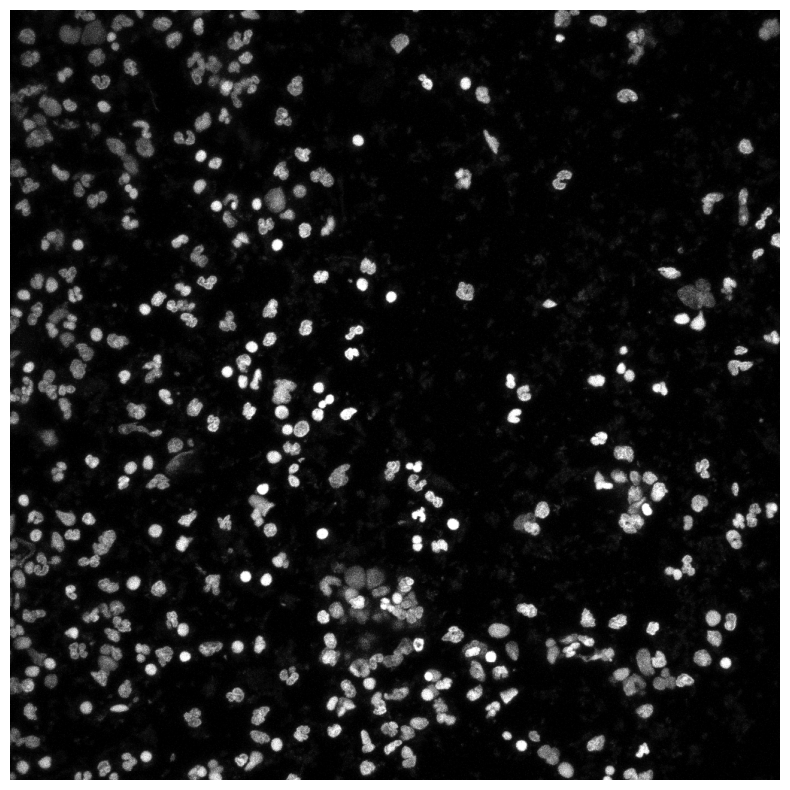

In [187]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(img, cmap='gray')
ax.axis('off')

### Fig. S7b

(-0.5, 1023.5, 1023.5, -0.5)

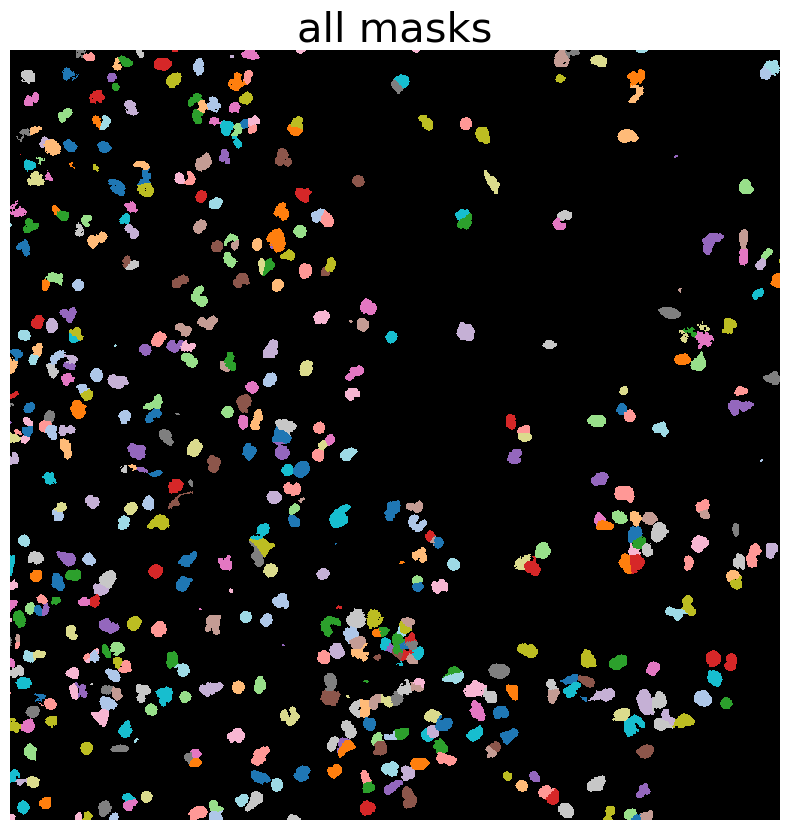

In [188]:
tab = mpl.colormaps['tab20']
cm = {}
np.random.seed(12341)
for lab in np.unique(seg):
  if lab == 0:
    cm[lab] = (0, 0, 0)
  else:
    cm[lab] = tab(np.random.randint(20))

seg_2d = seg.max(axis=0)
seg_vis = np.zeros((1024, 1024, 3))
for x in range(1024):
  for y in range(1024):
    seg_vis[x, y] = cm[seg_2d[x, y]][:3]

fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(seg_vis, interpolation='nearest')
ax.set_title('all masks', size=30)
ax.axis('off')

### Fig. S7d

(-0.5, 1023.5, 1023.5, -0.5)

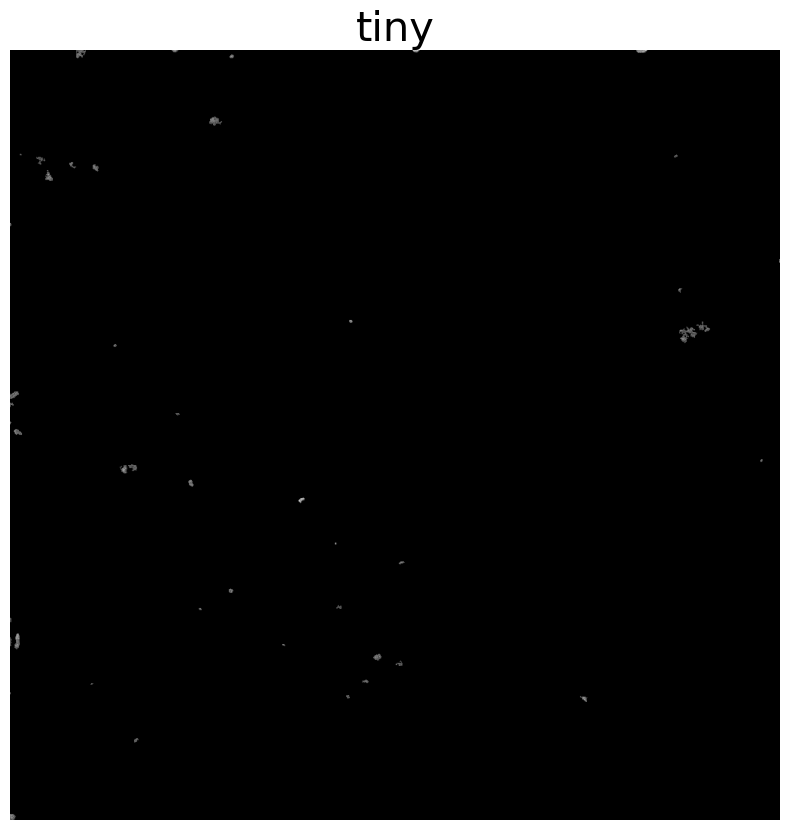

In [189]:
min_size = 300
sizes = np.bincount(seg.flatten())[1:]  # skip background
tiny = 1 + np.argwhere(sizes < min_size).flatten()

seg_2d_mask = np.isin(seg_2d, tiny)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(seg_2d_mask[:, :] * img, cmap='gray')
ax.set_title('tiny', size=30)
ax.axis('off')

### Fig. S7e

(-0.5, 1023.5, 1023.5, -0.5)

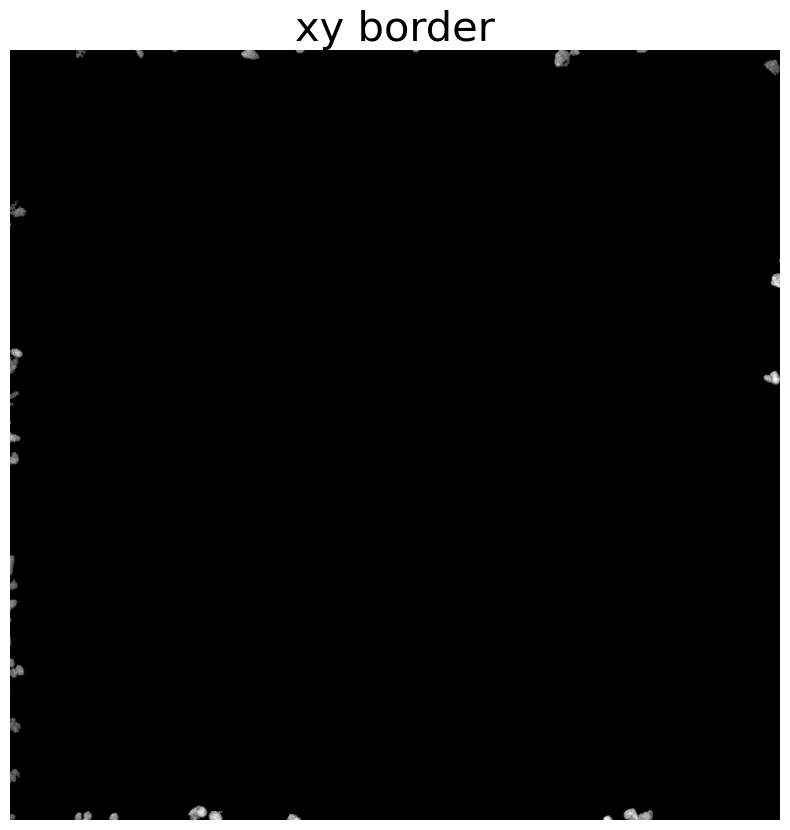

In [190]:
xy_border = np.unique(np.concatenate([
      np.unique(seg[:, 0, :]), np.unique(seg[:, -1, :]),
      np.unique(seg[:, :, 0]), np.unique(seg[:, :, -1])]))[1:]

seg_2d_mask = np.isin(seg_2d, xy_border)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(seg_2d_mask[:, :] * img, cmap='gray')
ax.set_title('xy border', size=30)
ax.axis('off')

### Fig. S7f

(-0.5, 1023.5, 1023.5, -0.5)

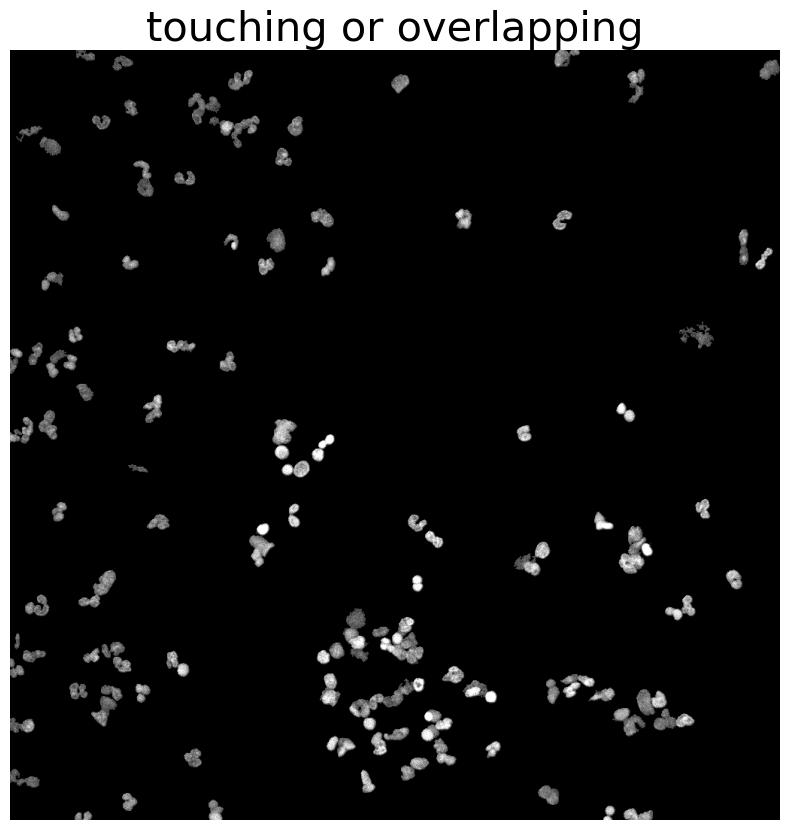

In [191]:
views = view_as_windows(seg, (2, 1, 1)).reshape(-1, 2)
views = views[views[:,0] != 0]  # drop background
views = views[views[:,1] != 0]  # drop background
views = views[views[:,0] != views[:,1]]  # drop matching
z_touching = np.unique(views)

views = view_as_windows(seg, (1, 2, 1)).reshape(-1, 2)
views = views[views[:,0] != 0]  # drop background
views = views[views[:,1] != 0]  # drop background
views = views[views[:,0] != views[:,1]]  # drop matching
x_touching = np.unique(views)

views = view_as_windows(seg, (1, 1, 2)).reshape(-1, 2)
views = views[views[:,0] != 0]  # drop background
views = views[views[:,1] != 0]  # drop background
views = views[views[:,0] != views[:,1]]  # drop matching
y_touching = np.unique(views)

seg_max = seg.max(axis=0)  # max z project
seg_min = seg.min(axis=0, where=seg!=0, initial=seg.max())  # min z project
seg_min[seg_max == 0] = 0  # background
z_overlap = np.unique(seg[:, seg_max != seg_min])[1:]

seg_2d_mask = np.isin(seg_2d, z_touching) | np.isin(seg_2d, x_touching) | np.isin(seg_2d, y_touching) | np.isin(seg_2d, z_overlap)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(seg_2d_mask[:, :] * img, cmap='gray')
ax.set_title('touching or overlapping', size=30)
ax.axis('off')

### Fig. S7c

(-0.5, 1023.5, 1023.5, -0.5)

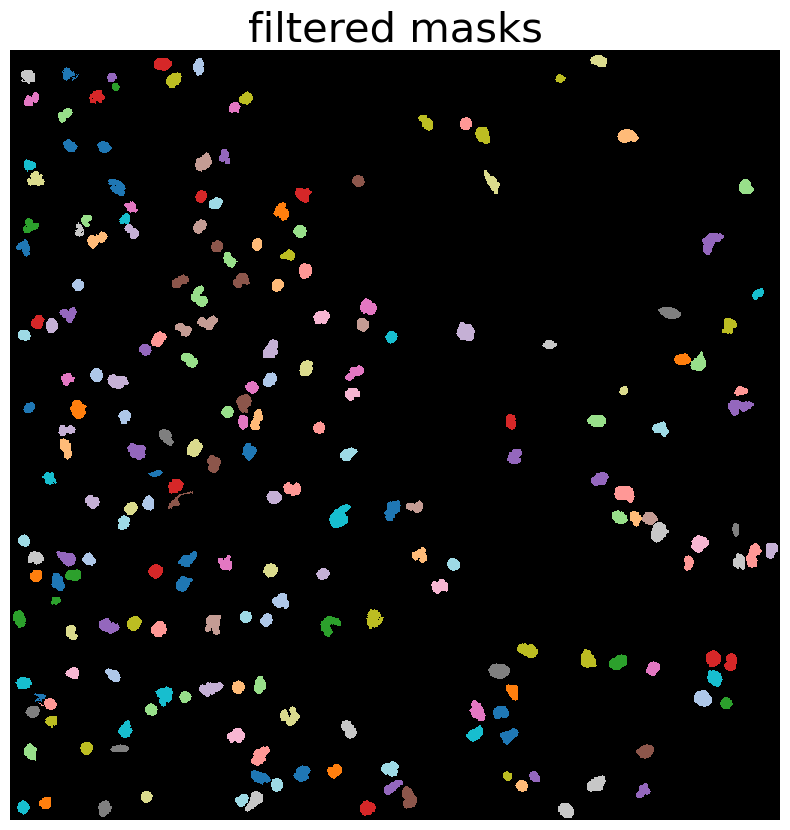

In [192]:
seg_2d_mask =  np.isin(seg_2d, z_touching) | np.isin(seg_2d, x_touching) | np.isin(seg_2d, y_touching) | np.isin(seg_2d, tiny) | np.isin(seg_2d, xy_border) | np.isin(seg_2d, z_overlap)
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
ax.imshow(~seg_2d_mask[:, :, None] * seg_vis, interpolation='nearest')
ax.set_title('filtered masks', size=30)
ax.axis('off')

## Stats

In [193]:
seg_dir = f'/ewsc/hschluet/pbmc5/seg_voronoi_otsu/'
well_exclude = {1 : [],
                2: ['D11', 'E03'],  # contaminated
                3 : ['D12', 'E12', 'F01', 'H01', 'H05',
                     'A05', 'C01', 'E07', 'H08', 'H11'],
                4 : ['A12', 'C10', 'D04', 'D12', 'E08'],
                5 : ['C09', 'E05', 'E11', 'G03', 'G07'],
                6 : ['B08', 'C03', 'D05', 'F11', 'H02'],
                7 : ['B10'],
                8 : ['A04', 'A08', 'A11', 'B05', 'B06', 'B08', 'C09',
                    'D10', 'E11', 'F03', 'G08'],
                9 : ['A12'],
                10 : ['A08', 'A10', 'A11', 'B09', 'E03', 'E10', 'G08'],
                11 : [],
                12 : [],
                13 : ['B05'],
                14 : ['B08'],
                15 : [],
                16 : ['H10']}

qcs = []
for p in tqdm([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]):
  info = pd.read_csv(f'/ewsc/hschluet/pbmc5/data/pbmc5/layout/plate_{p}_layout.csv', index_col=0)
  for fpath in glob.glob(f'{seg_dir}Plate{p}/qc/*exclusion_checks.csv'):
    qc = pd.read_csv(fpath)
    qc['plate'] = p
    fname = fpath.split('/')[-1]
    well = fname.split('_')[0][4:]
    # print(fname, well)
    if well in well_exclude[p]:
      print(fname, well, fpath)
      continue

    sample = info.loc[well, 'sample']
    if pd.isna(sample):
      print(p, fname, well, 'masks', len(qc), 'tiny', qc['tiny'].sum())
      continue 

    qc['patient'] = sample.split('_')[0]
    qc['time'] = 0 if sample[0] == 'H' else sample.split('_')[1]

    qcs.append(qc)

qc = pd.concat(qcs, ignore_index=True)
qc

  0%|          | 0/16 [00:00<?, ?it/s]

,id,tiny,dim,xy touching,z touching,xy border,upper z border,lower z border,z overlap,plate,patient,time
0,1,True,False,False,False,False,False,False,False,1,P57,1
1,2,True,False,False,False,False,False,False,False,1,P57,1
2,3,True,False,False,False,False,False,False,False,1,P57,1
3,4,True,False,False,False,False,False,False,False,1,P57,1
4,5,True,False,False,False,False,False,False,False,1,P57,1
...,...,...,...,...,...,...,...,...,...,...,...,...
9074041,21,False,False,False,False,False,False,True,False,16,P139,3
9074042,22,True,False,False,False,False,False,False,False,16,P139,3
9074043,23,True,False,False,False,False,False,False,False,16,P139,3
9074044,24,True,False,False,False,False,False,False,False,16,P139,3


In [194]:
qc['strict'] = ~(qc[['tiny', 'dim', 'z overlap', 'xy touching', 'xy border', 'upper z border', 'lower z border']].any(axis=1))
qc['relaxed'] = ~(qc[['tiny', 'dim', 'z overlap', 'xy touching', 'xy border']].any(axis=1))
qc['cell'] = ~(qc[['tiny', 'dim']].any(axis=1))
qc

,id,tiny,dim,xy touching,z touching,xy border,upper z border,lower z border,z overlap,plate,patient,time,strict,relaxed,cell
0,1,True,False,False,False,False,False,False,False,1,P57,1,False,False,False
1,2,True,False,False,False,False,False,False,False,1,P57,1,False,False,False
2,3,True,False,False,False,False,False,False,False,1,P57,1,False,False,False
3,4,True,False,False,False,False,False,False,False,1,P57,1,False,False,False
4,5,True,False,False,False,False,False,False,False,1,P57,1,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9074041,21,False,False,False,False,False,False,True,False,16,P139,3,False,True,True
9074042,22,True,False,False,False,False,False,False,False,16,P139,3,False,False,False
9074043,23,True,False,False,False,False,False,False,False,16,P139,3,False,False,False
9074044,24,True,False,False,False,False,False,False,False,16,P139,3,False,False,False


In [195]:
qc[qc['z touching']]['z overlap'].all()

True

In [196]:
qc.columns

Index(['id', 'tiny', 'dim', 'xy touching', 'z touching', 'xy border',
       'upper z border', 'lower z border', 'z overlap', 'plate', 'patient',
       'time', 'strict', 'relaxed', 'cell'],
      dtype='object')

### Fig. S7f

In [197]:
agg = qc.groupby('plate')[['tiny', 'dim', 'xy touching', 'z overlap', 'xy border',
                           'upper z border', 'lower z border', 'strict', 'relaxed', 'cell']].sum()
agg

,tiny,dim,xy touching,z overlap,xy border,upper z border,lower z border,strict,relaxed,cell
plate,,,,,,,,,,
1,62074,247845,140498,136996,11788,96534,30968,42592,73846,225074
2,40682,2600,341604,337142,27876,209895,170851,54721,144085,510815
3,10308,9997,54904,51562,5022,28873,26568,16976,34730,93366
4,117542,16910,462926,467594,35456,324909,87333,97059,164982,666162
5,81468,24188,365284,373265,30646,215483,298069,17191,116734,510061
6,39420,54,246908,239720,22559,135322,110534,68709,145242,413238
7,48940,1502,237132,226442,21676,122706,30280,101851,137859,394377
8,42539,76170,198277,197038,18334,131877,31033,88442,132120,352909
9,34783,283,184613,177833,18843,102231,110593,40810,102596,300506


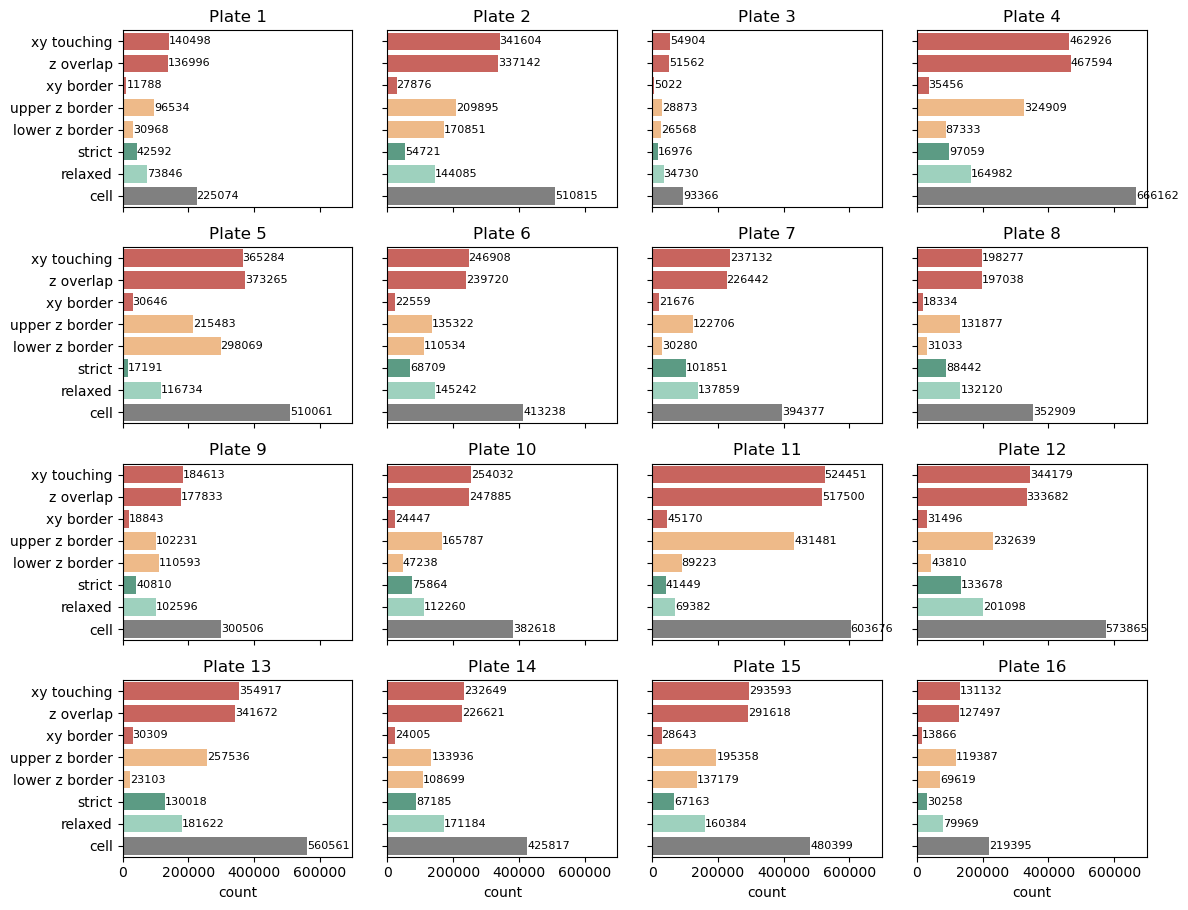

In [198]:
fig, axs = plt.subplots(4, 4, figsize=(4*3, 4*2.3), sharex=True, sharey=True)
for plate, ax in zip(np.arange(1, 17), axs.flatten()):
    data = pd.DataFrame(agg[['xy touching', 'z overlap', 'xy border', 'upper z border', 'lower z border', 'strict', 'relaxed', 'cell']].loc[plate].T
                        ).reset_index().rename(columns={plate:'count', 'index':'what'})

    sns.barplot(data=data, x='count', y='what', hue='what', ax=ax, 
                palette={'xy touching' : '#D9544D', 'z overlap' : '#D9544D', 'xy border' : '#D9544D', 
                        'upper z border' : '#ffb978', 'lower z border' : '#ffb978', 
                        'strict' : '#51A687', 'relaxed' : '#96D9C0', 'cell' : '#808080'})
    ax.set_ylabel('')
    ax.set_title(f'Plate {plate}')
    for container in ax.containers:
        ax.bar_label(container, size=8)
fig.tight_layout()

### Fig. S7g

In [199]:
agg = qc[qc['time'] == 0].groupby('patient')[['strict', 'relaxed']].sum()
agg = agg.iloc[np.argsort([int(pid[1:]) for pid in agg.index])]
agg

,strict,relaxed
patient,,
H01,2350,3986
H02,1053,2672
H03,745,1641
H04,3307,6690
H05,3117,6718
H06,2113,5618
H07,1031,2971
H09,5030,8316
H10,1818,4488


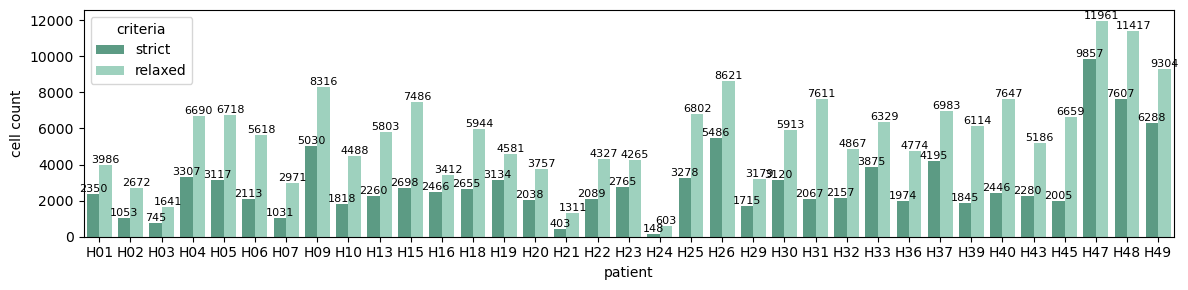

In [200]:
data = agg.reset_index().melt(id_vars='patient', value_vars=['strict', 'relaxed'], var_name='criteria', value_name='cell count')

fig, ax = plt.subplots(1, 1, figsize=(4*3, 3))
sns.barplot(data=data, x='patient', y='cell count', hue='criteria', ax=ax, 
            palette={'strict' : '#51A687', 'relaxed' : '#96D9C0'})
for container in ax.containers:
    ax.bar_label(container, size=8)
fig.tight_layout()

### Fig. S7h

In [201]:
agg = qc[qc['time'].astype(int) > 0].groupby(['patient', 'time'])['strict'].sum()
agg = agg.reset_index().pivot(index='patient', columns='time', values='strict')
agg = agg.iloc[np.argsort([int(pid[1:]) for pid in agg.index])]
agg

time,1,2,3,4,5
patient,,,,,
P11,229.0,53.0,61.0,140.0,618.0
P12,15.0,386.0,121.0,384.0,1.0
P13,3526.0,220.0,37.0,2059.0,663.0
P14,2284.0,885.0,541.0,2368.0,966.0
P15,2293.0,1272.0,2393.0,365.0,299.0
...,...,...,...,...,...
P163,791.0,162.0,172.0,2172.0,NaN
P164,3553.0,6013.0,1651.0,4636.0,2265.0
P165,1323.0,221.0,89.0,293.0,429.0


/tmp/ipykernel_630783/412608518.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = agg[:75].applymap(lambda f : f'{int(f):d}' if not pd.isna(f) else '').values


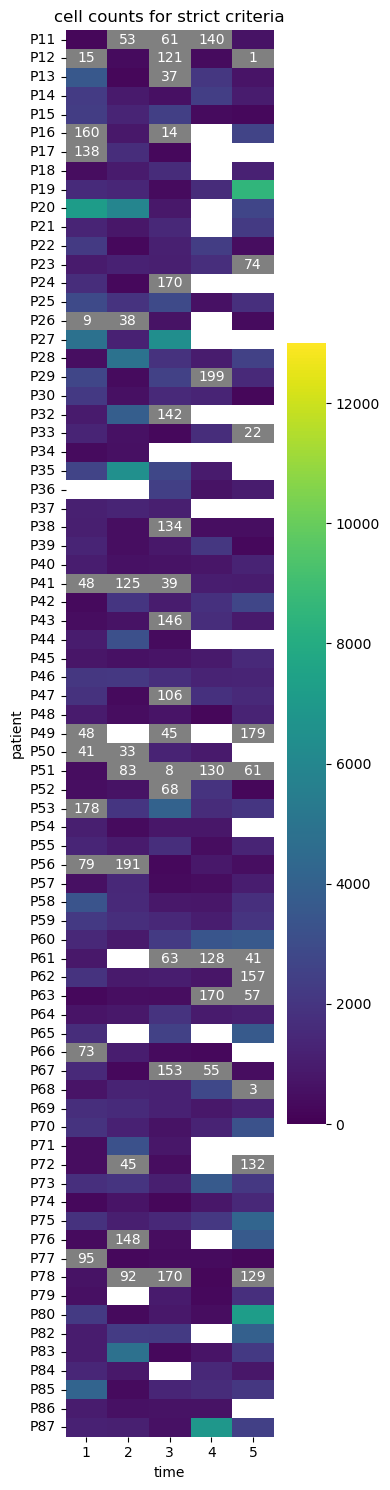

In [202]:
fig, ax = plt.subplots(1, 1, figsize=(4, 15))
annot = agg[:75].applymap(lambda f : f'{int(f):d}' if not pd.isna(f) else '').values
annot[(agg[:75] >= 200)] = ''
sns.heatmap(data=agg[:75], cmap='viridis', vmax=13000, vmin=0)
sns.heatmap(data=agg[:75] < 200, annot=annot, fmt='', cmap=['#80808000', '#808080FF'], cbar=False)
ax.set_title('cell counts for strict criteria')
fig.tight_layout()

/tmp/ipykernel_630783/2290186207.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = agg[75:].applymap(lambda f : f'{int(f):d}' if not pd.isna(f) else '').values


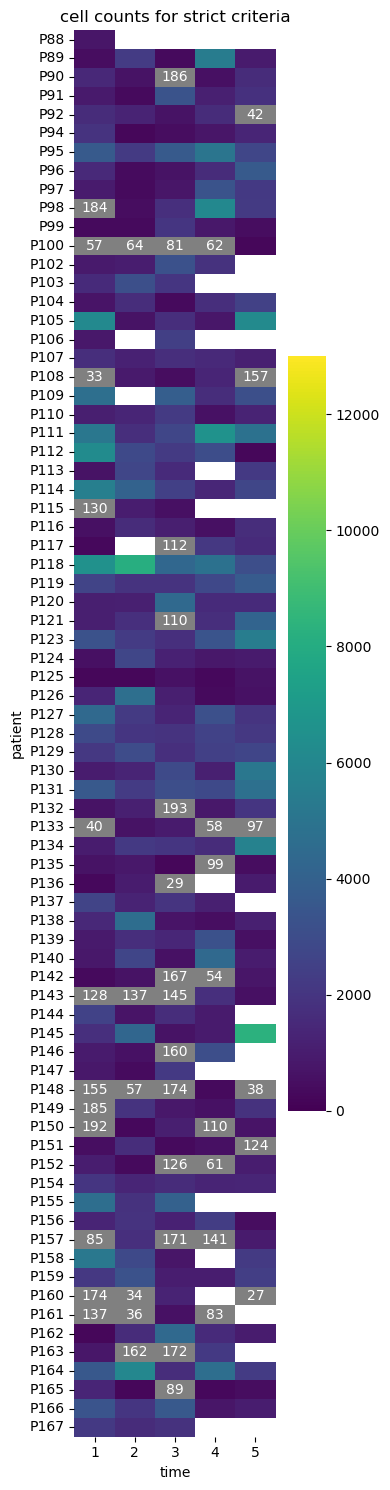

In [203]:
fig, ax = plt.subplots(1, 1, figsize=(4, 15))
annot = agg[75:].applymap(lambda f : f'{int(f):d}' if not pd.isna(f) else '').values
annot[(agg[75:] >= 200)] = ''
sns.heatmap(data=agg[75:], cmap='viridis', vmax=13000, vmin=0)
sns.heatmap(data=agg[75:] < 200, annot=annot, fmt='', cmap=['#80808000', '#808080FF'], cbar=False)
ax.set_title('cell counts for strict criteria')
fig.tight_layout()

In [204]:
agg = qc[qc['time'].astype(int) > 0].groupby(['patient', 'time'])['relaxed'].sum()
agg = agg.reset_index().pivot(index='patient', columns='time', values='relaxed')
agg = agg.iloc[np.argsort([int(pid[1:]) for pid in agg.index])]
agg

time,1,2,3,4,5
patient,,,,,
P11,669.0,105.0,132.0,556.0,1348.0
P12,278.0,1360.0,575.0,2259.0,36.0
P13,4343.0,394.0,54.0,3825.0,936.0
P14,7336.0,2100.0,1080.0,4366.0,2247.0
P15,4435.0,2932.0,5511.0,629.0,574.0
...,...,...,...,...,...
P163,1736.0,528.0,642.0,2915.0,NaN
P164,5570.0,7476.0,4162.0,6556.0,3214.0
P165,2253.0,677.0,146.0,970.0,652.0


/tmp/ipykernel_630783/2749545681.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = agg[:75].applymap(lambda f : f'{int(f):d}' if not pd.isna(f) else '').values


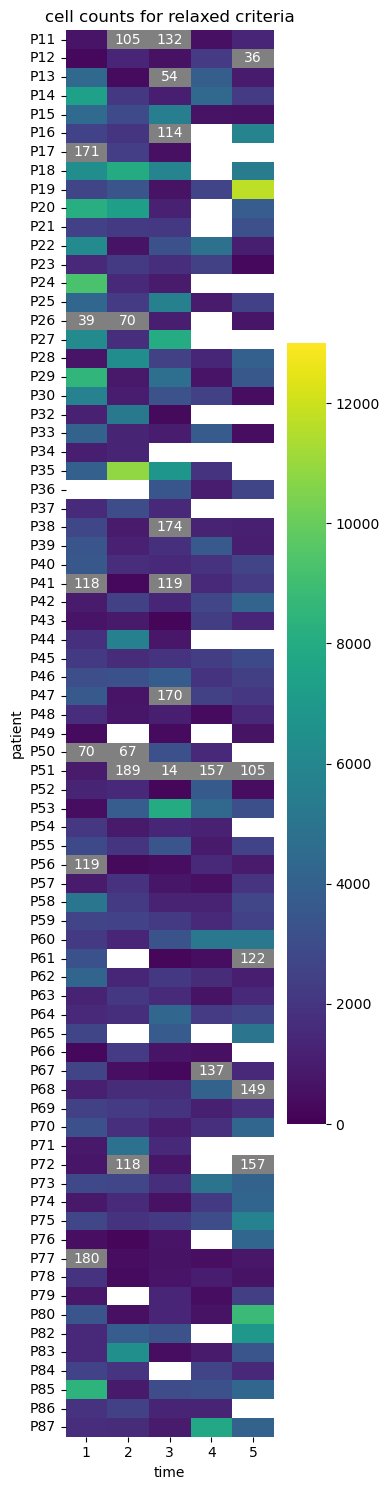

In [205]:
fig, ax = plt.subplots(1, 1, figsize=(4, 15))
annot = agg[:75].applymap(lambda f : f'{int(f):d}' if not pd.isna(f) else '').values
annot[(agg[:75] >= 200)] = ''
sns.heatmap(data=agg[:75], cmap='viridis', vmax=13000, vmin=0)
sns.heatmap(data=agg[:75] < 200, annot=annot, fmt='', cmap=['#80808000', '#808080FF'], cbar=False)
ax.set_title('cell counts for relaxed criteria')
fig.tight_layout()

/tmp/ipykernel_630783/2143097690.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  annot = agg[75:].applymap(lambda f : f'{int(f):d}' if not pd.isna(f) else '').values


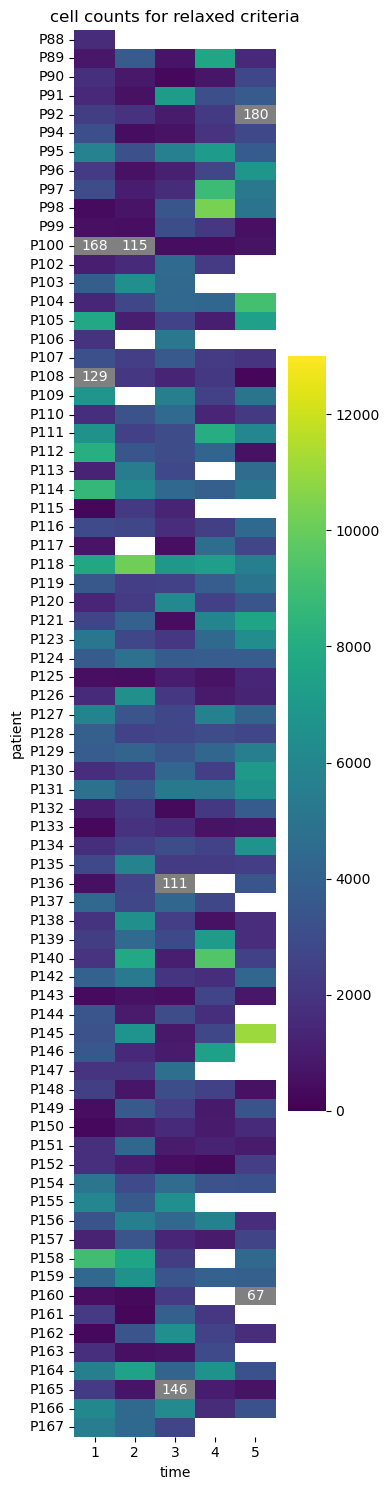

In [206]:
fig, ax = plt.subplots(1, 1, figsize=(4, 15))
sns.heatmap(data=agg[75:], cmap='viridis', vmax=13000, vmin=0)
annot = agg[75:].applymap(lambda f : f'{int(f):d}' if not pd.isna(f) else '').values
annot[(agg[75:] >= 200)] = ''
sns.heatmap(data=agg[75:] < 200, annot=annot,  cmap=['#80808000', '#808080FF'], fmt='', cbar=False)
ax.set_title('cell counts for relaxed criteria')
fig.tight_layout()

In [207]:
agg.max()

time
1     9257.0
2    10838.0
3     8011.0
4    10315.0
5    11712.0
dtype: float64